<a href="https://colab.research.google.com/github/Sapalermo/Progetto-Icon-Heart-Disease/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
!pip install pgmpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 33.5 MB/s eta 0:00:00


   age  gender  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0   52       1   0       125   212    0        1      168      0      1.0   
1   53       1   0       140   203    1        0      155      1      3.1   
2   70       1   0       145   174    0        1      125      1      2.6   
3   61       1   0       148   203    0        1      161      0      0.0   
4   62       0   0       138   294    1        1      106      0      1.9   

   slope  ca  thal  target  
0      2   2     3       0  
1      0   0     3       0  
2      0   0     3       0  
3      2   1     3       0  
4      1   3     2       0  


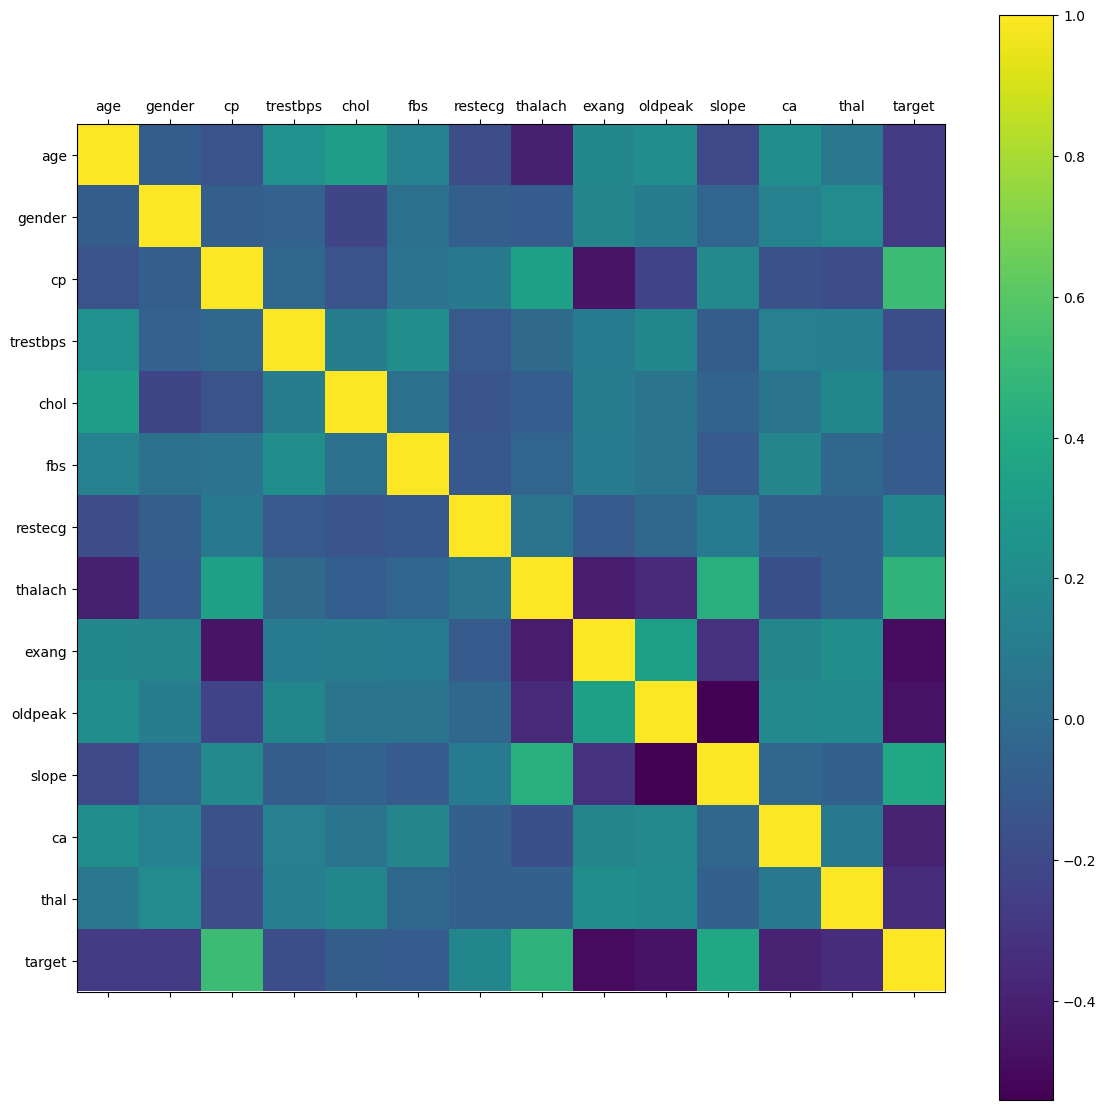

In [3]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from pgmpy.estimators import K2Score, HillClimbSearch, MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
from pgmpy.models import BayesianNetwork
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from matplotlib import pyplot as plt, rcParams
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold, cross_val_score

df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/heart.csv')
print(df.head(5))


# Nomino le colonne del dataset
cols = ["age","gender","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","target"]



# Creazione features X e target y
X = df.to_numpy()
y = df["target"].to_numpy()

rcParams['figure.figsize'] = 20, 14
plt.matshow(df.corr())
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.xticks(np.arange(df.shape[1]), df.columns)
plt.colorbar()





array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

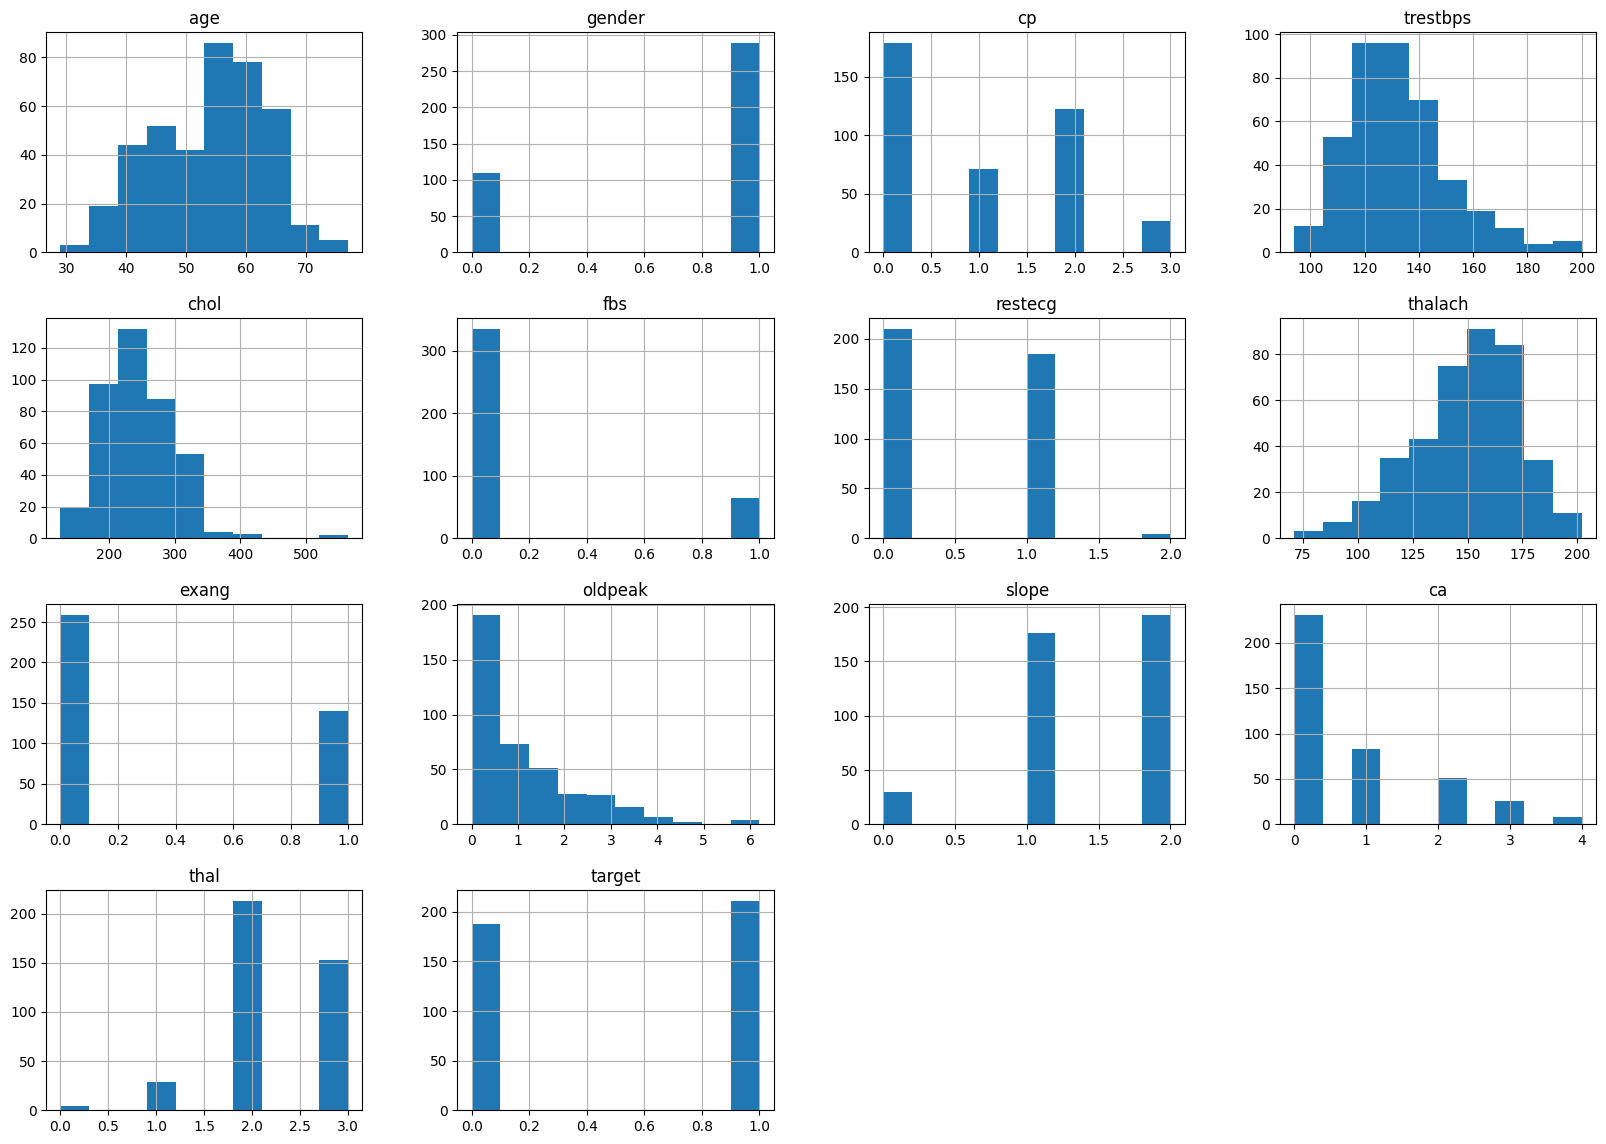

In [4]:
df.hist()

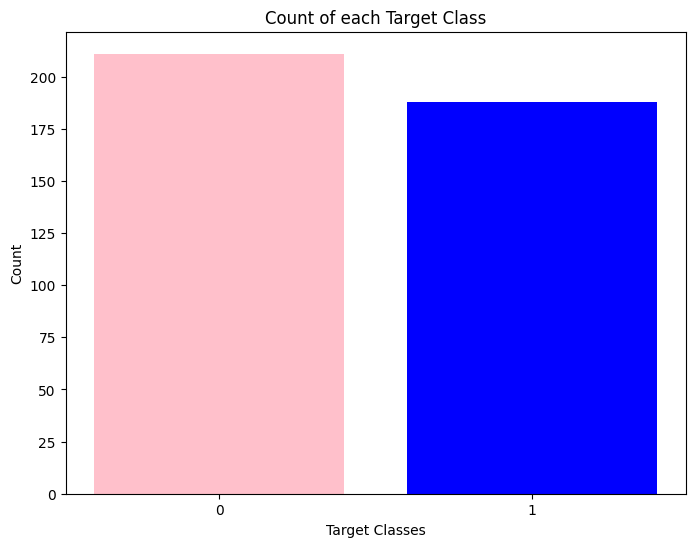

In [5]:
rcParams['figure.figsize'] = 8,6
plt.bar(df['target'].unique(), df['target'].value_counts(), color = ['pink', 'blue'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

def autopct(pct):
    return ('%.2f' % pct + "%") if pct > 1 else ''  # shows only values of labers that are greater than 1%



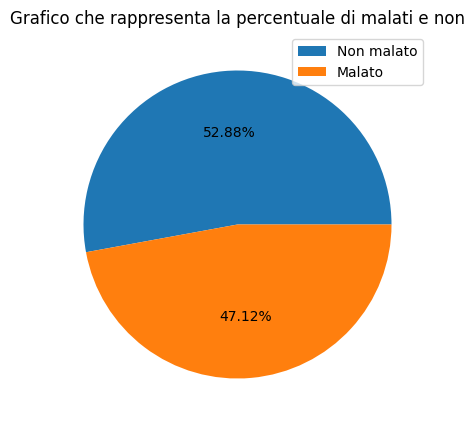

In [6]:
labels = ["Non malato", "Malato"]
ax = df['target'].value_counts().plot(kind='pie', figsize=(5, 5), autopct=autopct, labels=None)
ax.axes.get_yaxis().set_visible(False)
plt.title("Grafico che rappresenta la percentuale di malati e non")
plt.legend(labels=labels, loc="best")
plt.show()

Non è necessario effettuare il bilanciamento

In [7]:
y = df['target']
X = df.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


           model  accuracy  precision    recall   f1score
0  RandomForest  0.879679   0.866316  0.921916  0.889814
1           KNN  0.844423   0.844803  0.866548  0.853110
2  DecisionTree  0.894744   0.927836  0.870190  0.853110
3           SVC  0.691603   0.665664  0.832072  0.737851


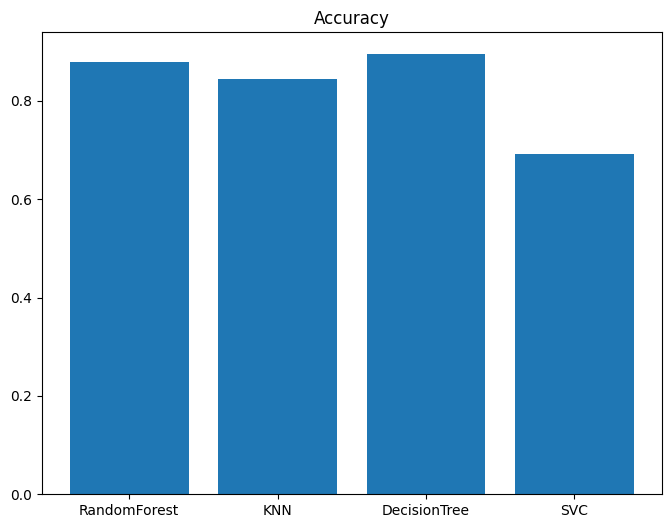

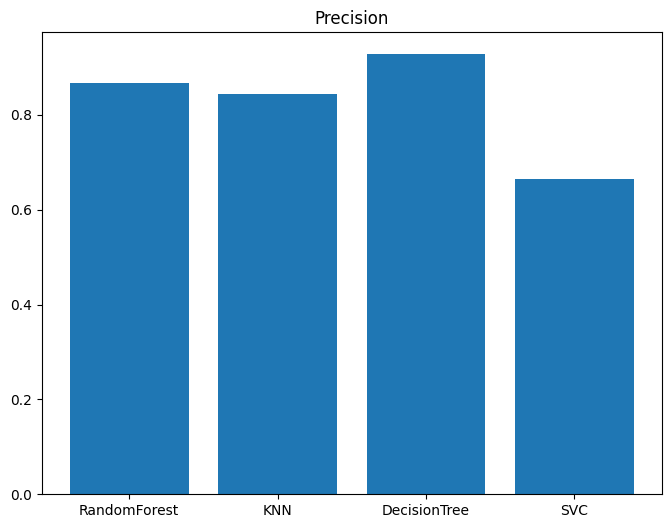

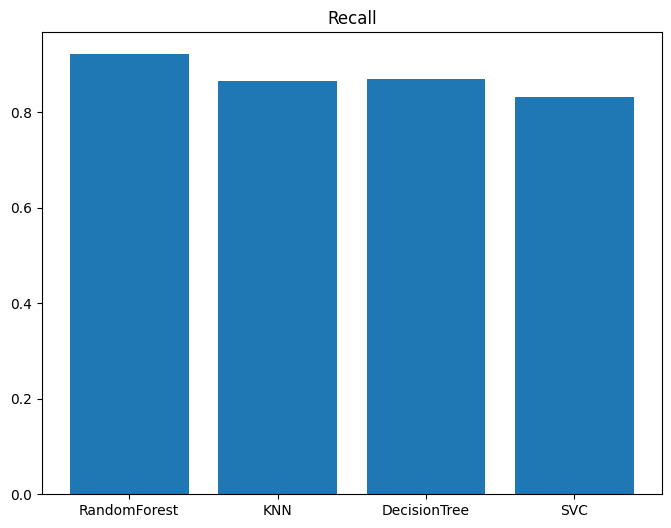

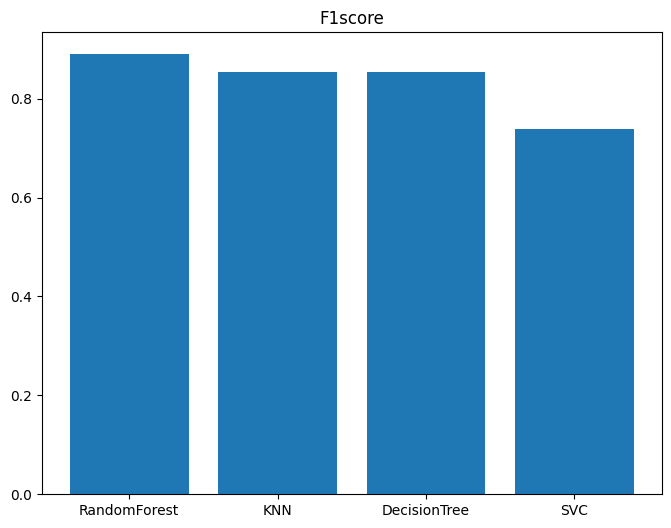

In [8]:
# Nomino le colonne del dataset
cols = ["age","gender","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","target"]

# K-FOLD e classificazione

# Creazione features X e target y
X = df.to_numpy()
y = df["target"].to_numpy()

# K-Fold Cross Validation
kf = KFold(n_splits=10, shuffle=True, random_state= 0)

# Classificatori per la valutazione
knn = KNeighborsClassifier(weights="distance")
dtc = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0,max_depth=3)
svc = SVC(random_state=0)

model = {

    'RandomForest': {'accuracy_list': [],
                     'precision_list': [],
                     'recall_list': [],
                     'f1_list': []
                     },
    'KNN': {'accuracy_list': [],
            'precision_list': [],
            'recall_list': [],
            'f1_list': []
            },
    'DecisionTree': {'accuracy_list': [],
                     'precision_list': [],
                     'recall_list': [],
                     'f1_list': []
                    },
    'SVC': {'accuracy_list': [],
            'precision_list': [],
            'recall_list': [],
            'f1_list': []
            }
}


# K-Fold dei classificatori
for train_index, test_index in kf.split(X, y):
    training_set, testing_set = X[train_index], X[test_index]

    # Dati di train
    data_train = pd.DataFrame(training_set, columns=df.columns)
    X_train = data_train.drop("target", axis=1)
    y_train = data_train.target

    # Dati di test
    data_test = pd.DataFrame(testing_set, columns=df.columns)
    X_test = data_test.drop("target", axis=1)
    y_test = data_test.target

    # Fit dei classificatori
    knn.fit(X_train, y_train)
    dtc.fit(X_train, y_train)
    rfc.fit(X_train, y_train)
    svc.fit(X_train, y_train)

    y_pred_knn = knn.predict(X_test)
    y_pred_dtc = dtc.predict(X_test)
    y_pred_rfc = rfc.predict(X_test)
    y_pred_svc = svc.predict(X_test)

    # Salvo le metriche del fold nel dizionario per i classificatori
    model['KNN']['accuracy_list'].append(metrics.accuracy_score(y_test, y_pred_knn))
    model['KNN']['precision_list'].append(metrics.precision_score(y_test, y_pred_knn))
    model['KNN']['recall_list'].append(metrics.recall_score(y_test, y_pred_knn))
    model['KNN']['f1_list'].append(metrics.f1_score(y_test, y_pred_knn))

    model['DecisionTree']['accuracy_list'].append(metrics.accuracy_score(y_test, y_pred_dtc))
    model['DecisionTree']['precision_list'].append(metrics.precision_score(y_test, y_pred_dtc))
    model['DecisionTree']['recall_list'].append(metrics.recall_score(y_test, y_pred_dtc))
    model['DecisionTree']['f1_list'].append(metrics.f1_score(y_test, y_pred_knn))

    model['RandomForest']['accuracy_list'].append(metrics.accuracy_score(y_test, y_pred_rfc))
    model['RandomForest']['precision_list'].append(metrics.precision_score(y_test, y_pred_rfc))
    model['RandomForest']['recall_list'].append(metrics.recall_score(y_test, y_pred_rfc))
    model['RandomForest']['f1_list'].append(metrics.f1_score(y_test, y_pred_rfc))

    model['SVC']['accuracy_list'].append(metrics.accuracy_score(y_test, y_pred_svc))
    model['SVC']['precision_list'].append(metrics.precision_score(y_test, y_pred_svc))
    model['SVC']['recall_list'].append(metrics.recall_score(y_test, y_pred_svc))
    model['SVC']['f1_list'].append(metrics.f1_score(y_test, y_pred_svc))

def model_report(model):

            df_models = []

            for clf in model:
                df_model = pd.DataFrame({'model': [clf],
                                               'accuracy': [np.mean(model[clf]['accuracy_list'])],
                                               'precision': [np.mean(model[clf]['precision_list'])],
                                               'recall': [np.mean(model[clf]['recall_list'])],
                                               'f1score': [np.mean(model[clf]['f1_list'])]
                                               })

                df_models.append(df_model)
            return df_models


df_models_concat = pd.concat(model_report(model), axis=0).reset_index()  # concatenation of the models
df_models_concat = df_models_concat.drop('index', axis=1)  # removal of the index
print("\n", df_models_concat)  # table display

# Accuracy Graph
x = df_models_concat.model
y = df_models_concat.accuracy

plt.bar(x, y)
plt.title("Accuracy")
plt.show()

# Precision Graph
x = df_models_concat.model
y = df_models_concat.precision

plt.bar(x, y)
plt.title("Precision")
plt.show()

# Recall Graph
x = df_models_concat.model
y = df_models_concat.recall

plt.bar(x, y)
plt.title("Recall")
plt.show()

# F1score Graph
x = df_models_concat.model
y = df_models_concat.f1score

plt.bar(x, y)
plt.title("F1score")
plt.show()

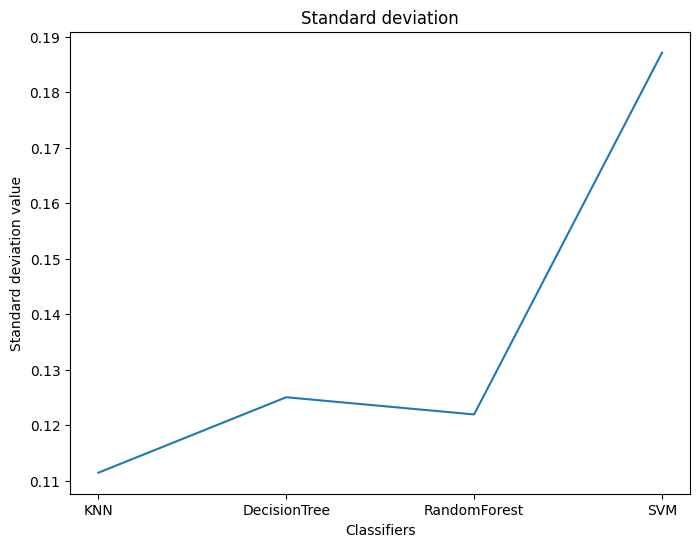


Standard deviation for Knn: 0.1114606181023374

Standard deviation for DecisionTree: 0.12505101000008284

Standard deviation for RandomForest: 0.12195265056402768

Standard deviation for SVM: 0.18708286933869706


In [9]:
# Standard deviation

std_knn = np.std(cross_val_score(knn, X_test, y_test, cv=5, n_jobs=5))
std_dtc = np.std(cross_val_score(dtc, X_test, y_test, cv=5, n_jobs=5))
std_rfc = np.std(cross_val_score(rfc, X_test, y_test, cv=5, n_jobs=5))
std_svc = np.std(cross_val_score(svc, X_test, y_test, cv=5, n_jobs=5))
plt.plot(["KNN", "DecisionTree", "RandomForest", "SVM"],
             [std_knn, std_dtc, std_rfc, std_svc])
plt.title("Standard deviation")
plt.ylabel("Standard deviation value")
plt.xlabel("Classifiers")
plt.show()
print("\nStandard deviation for Knn:", std_knn)
print("\nStandard deviation for DecisionTree:", std_dtc)
print("\nStandard deviation for RandomForest:", std_rfc)
print("\nStandard deviation for SVM:", std_svc)

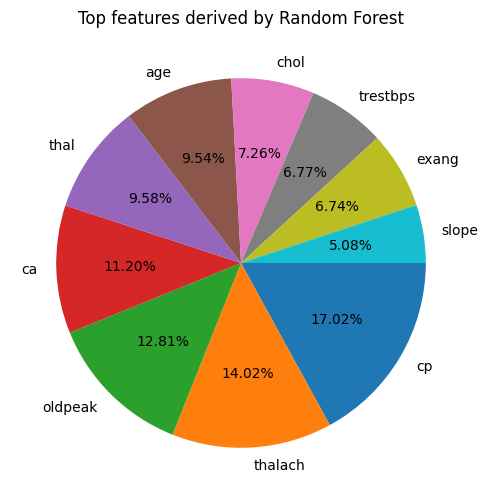

In [10]:
# VERIFICATION OF THE IMPORTANCE OF FEATURES


    # Creation of X feature and target y
X = df.drop('target', axis=1)
y = df['target']

# Classifier to be used for the search of the main features
rfc = RandomForestClassifier(random_state=42, n_estimators=100)
rfc_model = rfc.fit(X, y)

    # Tracking features based on their importance
ax = (pd.Series(rfc_model.feature_importances_, index=X.columns)
.nlargest(10)  # maximum number of features to display
.plot(kind='pie', figsize=(6, 6), autopct=autopct)  # type of chart and size
.invert_yaxis())  # to ensure a descending order

    # Visualization of the graph of the most important features
plt.title("Top features derived by Random Forest")
plt.ylabel("")
plt.show()

In [11]:
# Rete Bayesiana
from pgmpy.inference import VariableElimination
# Conversione dei valori all'interno del dataframe in interi
df_int = np.array(df, dtype=int)
df = pd.DataFrame(df_int, columns=df.columns)

# Creation of X feature and target y
X_train = df
y_train = df["target"]

k2 = K2Score(X_train)
hc_k2 = HillClimbSearch(X_train)
k2_model = hc_k2.estimate(scoring_method=k2)

bNet = BayesianNetwork(k2_model.edges())
bNet.fit(df, estimator=MaximumLikelihoodEstimator)
data = VariableElimination(bNet)
print("\nMarkov blanket for \"cp\"")
print(bNet.get_markov_blanket('cp'), "\n")


print("Il valore di probabilità oscilla tra 0 (evento impossibile) e 1 (evento certo)\n")

print("Probability control of features that affect gender:")
# Soggetti non malati
print("Test su soggetto di sesso femminile non malato")
donna = data.query(show_progress=False, variables=['cp'], evidence={'restecg': 0, 'chol': 200,
                                                                            'exang': 0, 'thalach': 170, 'age': 50,
                                                                            'target': 0, 'gender': 0
                                                                    })
print(donna, '\n')
print("Test su soggetto di sesso maschile non malato")
uomo = data.query(show_progress=False, variables=['cp'], evidence={'restecg': 1, 'chol': 300,
                                                                            'exang': 1, 'thalach': 150, 'age': 40,
                                                                            'target': 0, 'gender': 1})
print(uomo, '\n')

# Soggetti malati
print("Test su soggetto di sesso femminile malato")
donna = data.query(show_progress=False, variables=['cp'], evidence={'restecg': 0, 'chol': 200,
                                                                            'exang': 0, 'thalach': 170, 'age': 50,
                                                                            'target': 1, 'gender': 0
                                                                    })
print(donna, '\n')
print("Test su soggetto di sesso maschile malato")
uomo = data.query(show_progress=False, variables=['cp'], evidence={'restecg': 1, 'chol': 300,
                                                                            'exang': 1, 'thalach': 150, 'age': 40,
                                                                            'target': 1, 'gender': 1})
print(uomo, '\n')

  0%|          | 0/1000000 [00:00<?, ?it/s]


Markov blanket for "cp"
['thalach', 'restecg', 'target', 'age', 'gender', 'chol', 'exang'] 

Il valore di probabilità oscilla tra 0 (evento impossibile) e 1 (evento certo)

Probability control of features that affect gender:
Test su soggetto di sesso femminile non malato
+-------+-----------+
| cp    |   phi(cp) |
+=======+===========+
| cp(0) |    0.8040 |
+-------+-----------+
| cp(1) |    0.1388 |
+-------+-----------+
| cp(2) |    0.0573 |
+-------+-----------+
| cp(3) |    0.0000 |
+-------+-----------+ 

Test su soggetto di sesso maschile non malato
+-------+-----------+
| cp    |   phi(cp) |
+=======+===========+
| cp(0) |    0.0000 |
+-------+-----------+
| cp(1) |    0.0000 |
+-------+-----------+
| cp(2) |    0.7453 |
+-------+-----------+
| cp(3) |    0.2547 |
+-------+-----------+ 

Test su soggetto di sesso femminile malato
+-------+-----------+
| cp    |   phi(cp) |
+=======+===========+
| cp(0) |    0.5586 |
+-------+-----------+
| cp(1) |    0.2254 |
+-------+---------

In [14]:
print("\nMarkov blanket for \"target\"")
print(bNet.get_markov_blanket('target'), "\n")

nonMalati = data.query(show_progress=False, variables=['target'],
                            evidence={'restecg': 1, 'fbs': 0, 'oldpeak': 3, 'chol': 250, 'exang': 0 , 'thal': 2, 'ca': 3, 'thalach': 150, 'cp': 0, 'slope': 0, 'gender':1})

print('\nProbabilità per un potenziale non malato:')
print(nonMalati, '\n')

malato = data.query(show_progress=False, variables=['target'],
                        evidence={'restecg': 1, 'fbs': 1, 'oldpeak': 1, 'chol': 300, 'exang': 1 , 'thal': 1, 'ca': 0, 'thalach': 150, 'cp': 0, 'slope': 2, 'gender':1})
print('\nProbabilità per un potenziale malato:')
print(malato)

testNonMalato = data.query(show_progress=False, variables=['target'],
                                evidence={'restecg': 1, 'fbs': 0, 'oldpeak': 1, 'chol': 200, 'exang': 1 , 'thal': 2, 'ca': 0, 'thalach': 150, 'cp': 0, 'slope': 2, 'gender':1})

print('\nTest su soggetto potenzialmente non malato:')
print(testNonMalato, '\n')

testMalato = data.query(show_progress=False, variables=['target'],
                            evidence={'restecg': 1, 'fbs': 1, 'oldpeak': 3, 'chol': 200, 'exang': 1 , 'thal': 1, 'ca': 1, 'thalach': 150, 'cp': 3, 'slope': 0, 'gender':1})

print('\nTest su soggetto potenzialmente malato:')
print(testMalato, '\n')


Markov blanket for "target"
['restecg', 'thalach', 'ca', 'slope', 'gender', 'cp', 'chol', 'fbs', 'thal', 'oldpeak', 'exang'] 


Probabilità per un potenziale non malato:
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.9468 |
+-----------+---------------+
| target(1) |        0.0532 |
+-----------+---------------+ 


Probabilità per un potenziale malato:
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.6345 |
+-----------+---------------+
| target(1) |        0.3655 |
+-----------+---------------+

Test su soggetto potenzialmente non malato:
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.3530 |
+-----------+---------------+
| target(1) |        0.6470 |
+-----------+---------------+ 


Test su soggetto potenzialmente malato:
+-----------+---------------+
| target    |   phi(target) |
+=========

In [16]:
print("Vorresti effettuare una predizione?(si/no)")
errore=1
while errore == 1:
  risp = input(" > ")
  if risp=='si':
    bool=1
    while bool == 1:
        print("Seleziona una o più variabili (in caso si vogliano scrivere più di una variabile, separale con uno spazio):")
        for s in cols:
          print(" | "+s+" | ")
          print(" ---------")
        _input = input(" > ")
        var_list = _input.split(" ")
        for v in var_list:
            if v not in cols:
                    print("Variabile selezionata non presente nella lista")
            else: bool=0
    for x in var_list:
        cols.remove(x)
    while bool == 0:
        print("Seleziona l'evidenza dalla lista specificando il valore (esempio, gender:1):")
        for s in cols:
            print(s)
        _input = input(" > ")
        evidence_list = _input.split(" ")
        tokens = []
        for e in evidence_list:
            tokens += e.split(":")

        evidence_dict = {}
        if evidence_list != ['']:
            for t in tokens:
                if not t.isnumeric() and t not in cols:
                    print("Variabile selezionata non presente nella lista")
                else:bool=1
    it = iter(tokens)
    for x in it:
        evidence_dict.update({ x : int(next(it))})
    # Query definita e stampa risultato
    result = data.query(variables=var_list, evidence=evidence_dict)
    print(result)
    errore=0
  elif risp == 'no':
    print("Arrivederci")
    errore=0
  elif risp != 'si' or risp !='no':
    print("Riprova")

Vorresti effettuare una predizione?(si/no)
 > si
Seleziona una o più variabili (in caso si vogliano scrivere più di una variabile, separale con uno spazio):
 | age | 
 ---------
 | gender | 
 ---------
 | cp | 
 ---------
 | trestbps | 
 ---------
 | chol | 
 ---------
 | fbs | 
 ---------
 | restecg | 
 ---------
 | thalach | 
 ---------
 | exang | 
 ---------
 | oldpeak | 
 ---------
 | slope | 
 ---------
 | ca | 
 ---------
 | thal | 
 ---------
 | target | 
 ---------
 > target
Seleziona l'evidenza dalla lista specificando il valore (esempio, gender:1):
age
gender
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
 > gender:1 cp:2 thalach:155 thal:0
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.5043 |
+-----------+---------------+
| target(1) |        0.4957 |
+-----------+---------------+
